<a href="https://colab.research.google.com/github/venkat2ram/AI_Playground/blob/main/House_Price_Prediction_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **This notebook is created to perform data analysis for House price prediction.**


Import packages.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.pandas.set_option('display.max_columns',None)

Import data using pandas.

In [2]:
dataset=pd.read_csv(r'C:\AI Practice\House Price Prediction - Kaggle\house-prices-advanced-regression-techniques\train.csv')
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# **Exploratory Data Analysis**

**Get all the features with Null values**

In [3]:
features_with_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 ]

In [4]:
features_with_nan

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [5]:
for feature in features_with_nan:
  print(feature, 'has ', np.round(dataset[feature].isnull().mean(),4), '% of nan values')

LotFrontage has  0.1774 % of nan values
Alley has  0.9377 % of nan values
MasVnrType has  0.0055 % of nan values
MasVnrArea has  0.0055 % of nan values
BsmtQual has  0.0253 % of nan values
BsmtCond has  0.0253 % of nan values
BsmtExposure has  0.026 % of nan values
BsmtFinType1 has  0.0253 % of nan values
BsmtFinType2 has  0.026 % of nan values
FireplaceQu has  0.4726 % of nan values
GarageType has  0.0555 % of nan values
GarageYrBlt has  0.0555 % of nan values
GarageFinish has  0.0555 % of nan values
GarageQual has  0.0555 % of nan values
GarageCond has  0.0555 % of nan values
PoolQC has  0.9952 % of nan values
Fence has  0.8075 % of nan values
MiscFeature has  0.963 % of nan values


**As we have missing values for many features, We need to understand if the missing vaues have any effect on sales price. So, now for each feature which has missing values, compare the average salesprice for rows with missing value and rows without missing value.**

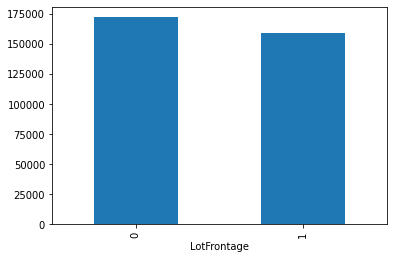

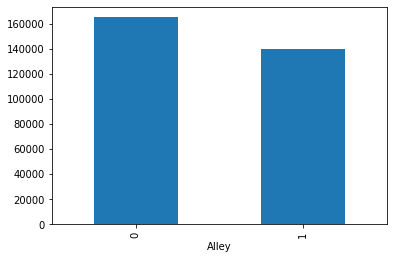

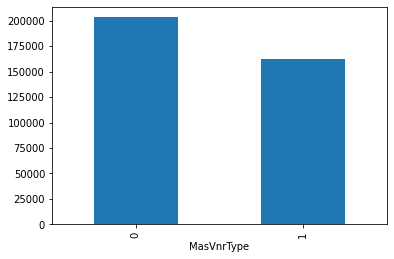

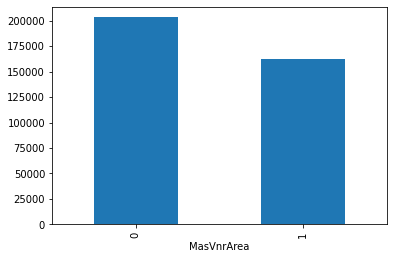

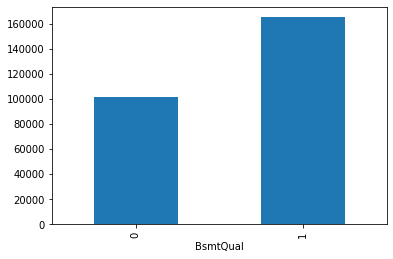

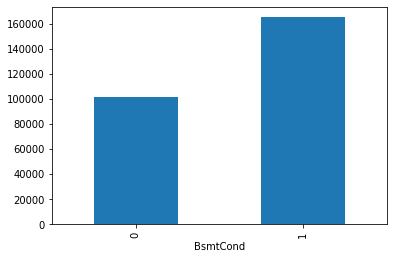

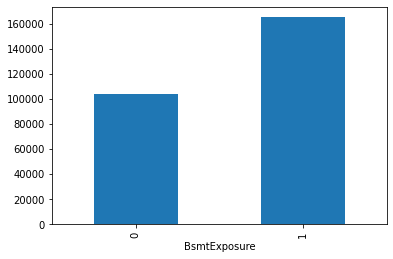

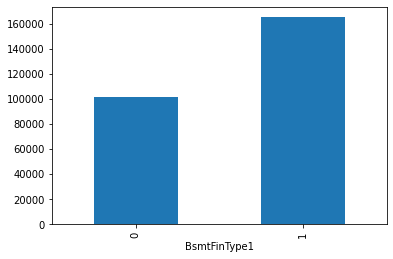

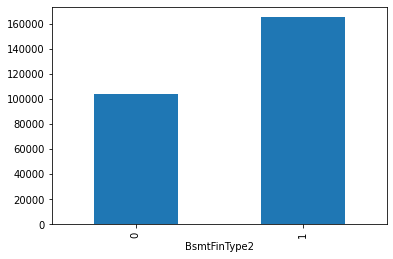

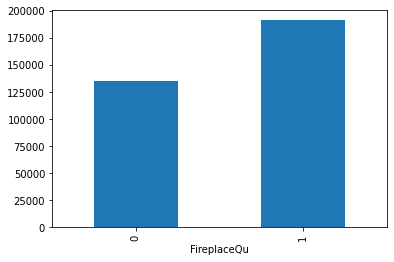

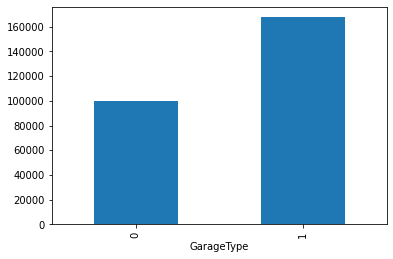

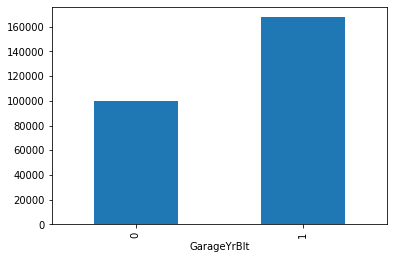

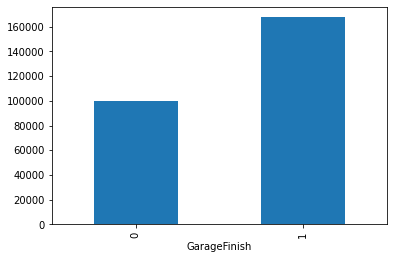

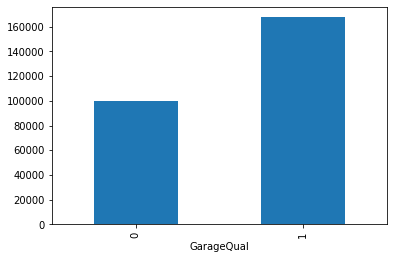

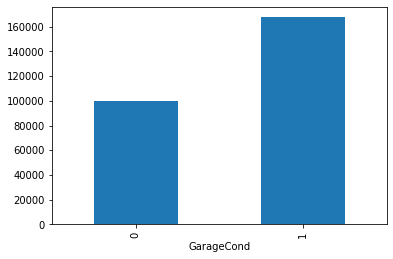

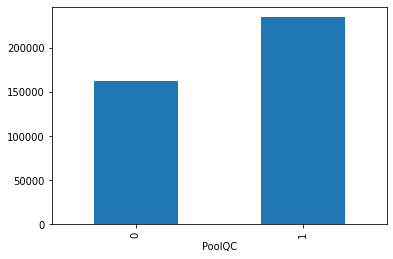

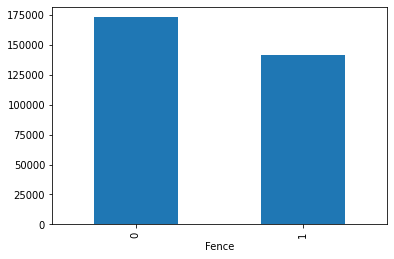

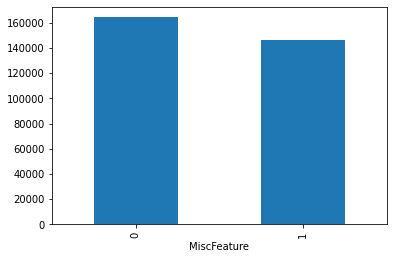

In [6]:
for feature in features_with_nan:
  data=dataset.copy()

  data[feature]=np.where(data[feature].isnull(),0,1)
  data.groupby(feature)['SalePrice'].median().plot.bar()
  #plt.title(feature)
  plt.show()

**Here the affect of missing values on salesprice is clearly visible. So we need to replace the missing values with proper values. We will do it in feature engineering.**


**Next, we need to identify Numerical features.**

In [7]:
features_with_Numeric=[feature for feature in dataset.columns if dataset[feature].dtypes!='O']
features_with_Numeric

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [8]:
dataset[features_with_Numeric]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,142125


**Temporal Variables(Year):**
**Check if any features has year stored. For this check the feature names has 'Yr' or 'Year' in it's name. This is not proper way to check the data. Please go to data and see values for each feature.**


In [9]:
features_with_Yr=[feature for feature in features_with_Numeric if 'Yr' in feature or 'Year' in feature]
features_with_Yr

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

**Above features store years. check how the each feature is affecting sales price with respect to YrSold**

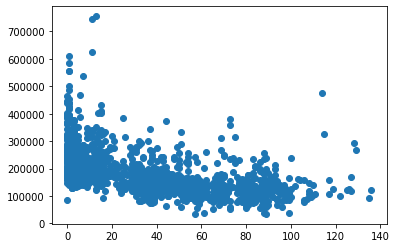

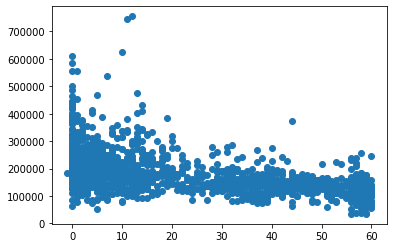

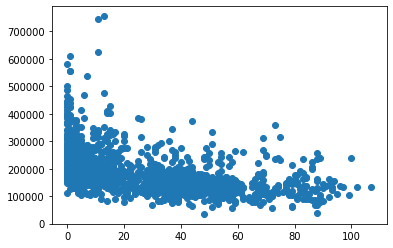

In [10]:
for feature in features_with_Yr:
  data=dataset.copy()
  if feature!='YrSold':
    data[feature]=data['YrSold']-data[feature]
    plt.scatter(data[feature],data['SalePrice'])
    #plt.title(feature)
    plt.show()


Teh above plots clearly shows that SalePrice is affected by year.

**Descrete variables(Columns with lass number of unique values):**

In [11]:
features_descrete=[feature for feature in features_with_Numeric if len(dataset[feature].unique())<25 and feature not in features_with_Yr and feature!='Id' ]
features_descrete


['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

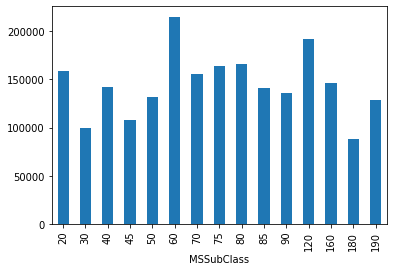

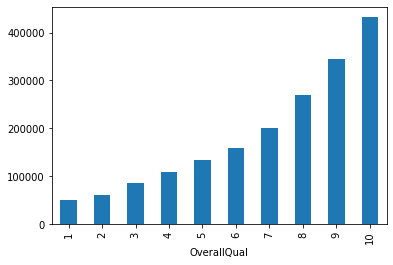

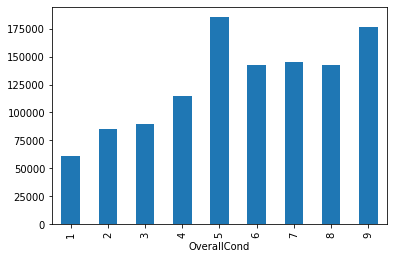

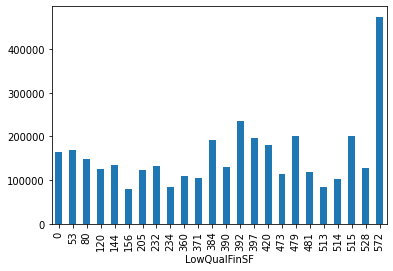

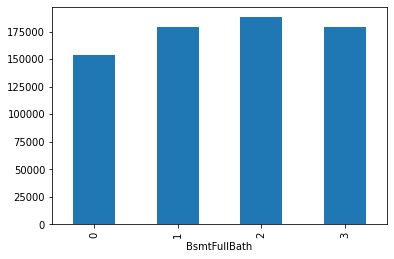

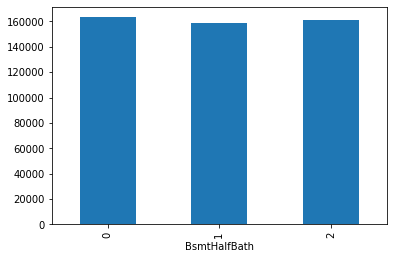

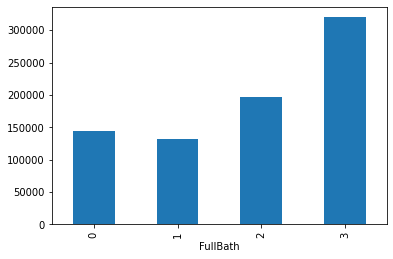

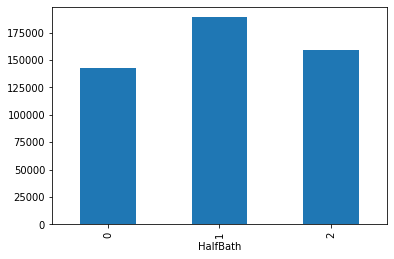

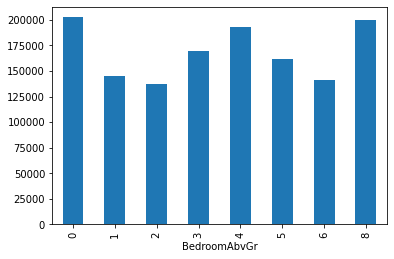

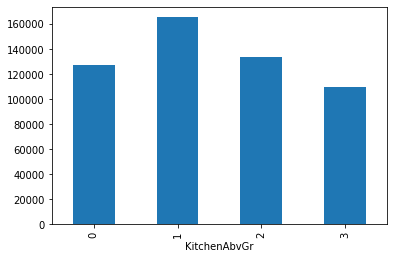

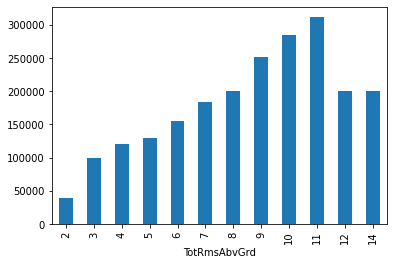

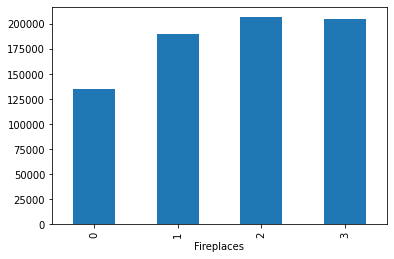

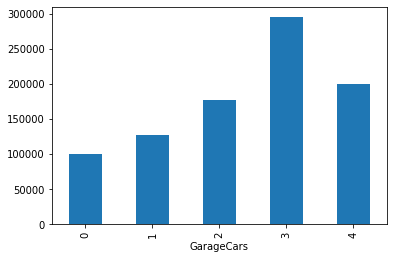

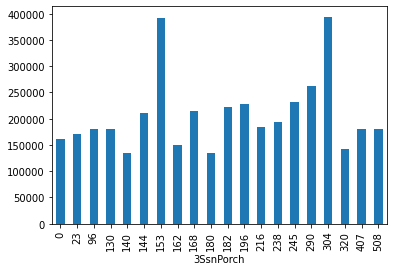

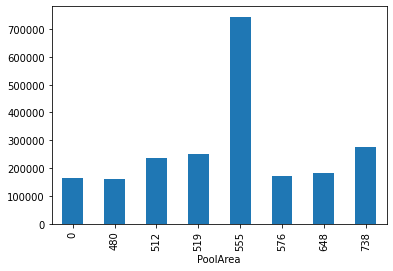

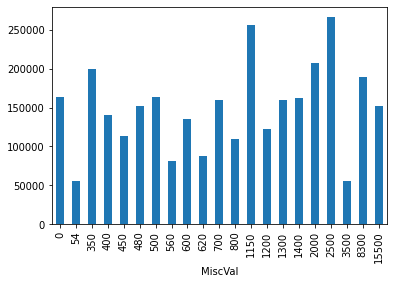

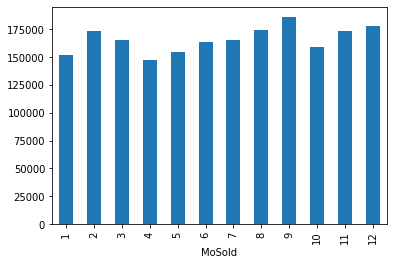

In [12]:
for feature in features_descrete:
  data=dataset.copy()

  data.groupby(feature)['SalePrice'].median().plot.bar()
  #plt.title(feature)
  plt.show()

**Continous feature:**

In [13]:
continuous_feature=[feature for feature in features_with_Numeric if feature not in features_descrete+features_with_Yr+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 16


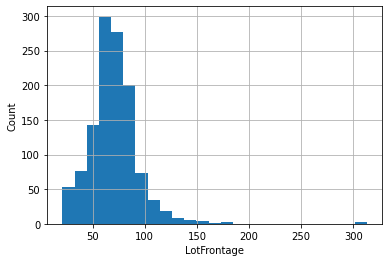

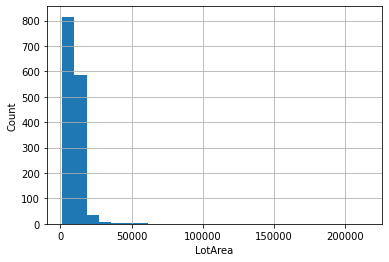

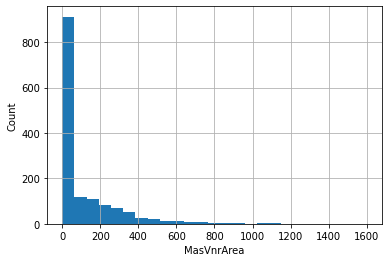

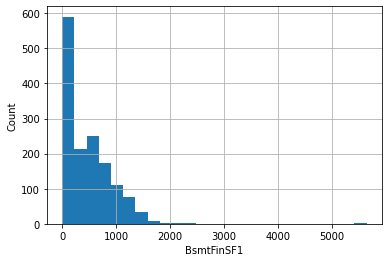

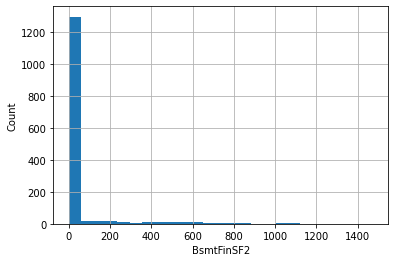

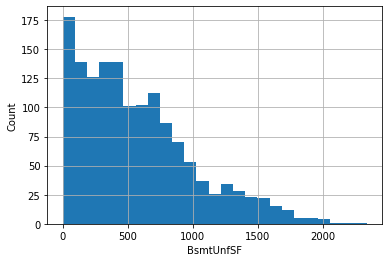

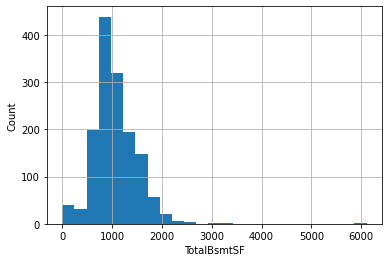

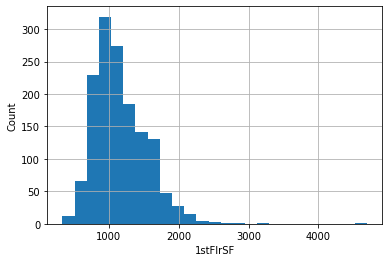

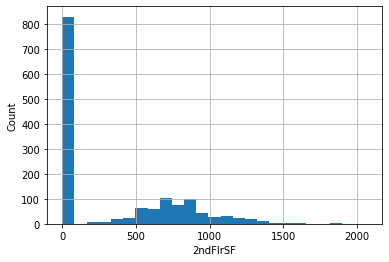

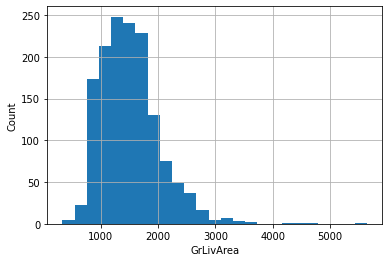

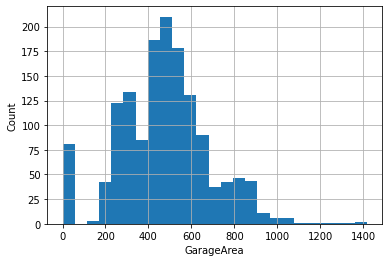

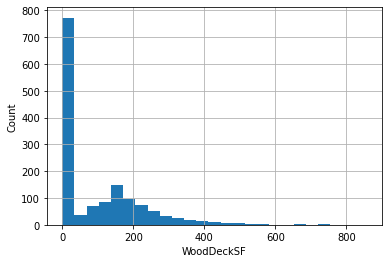

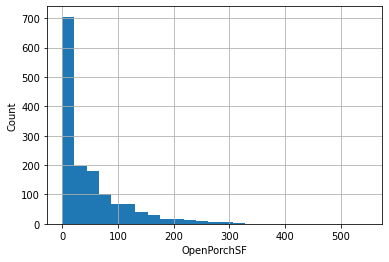

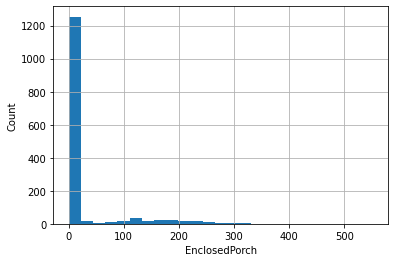

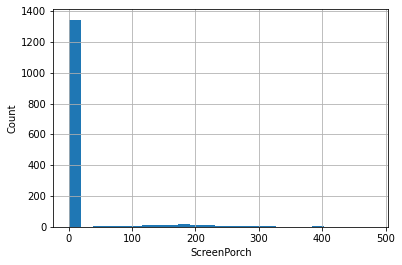

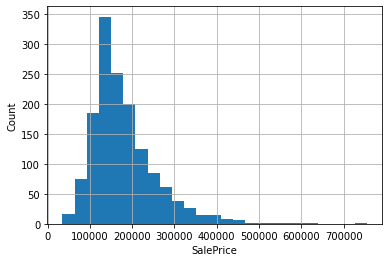

In [14]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    #plt.title(feature)
    plt.show()

From above charts, we can observe that the data is not well distributed. So we use apply log function to get the distribution.

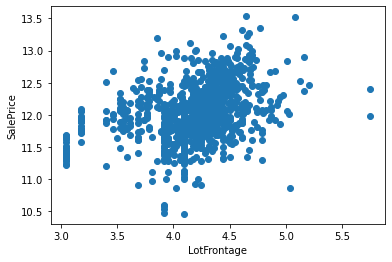

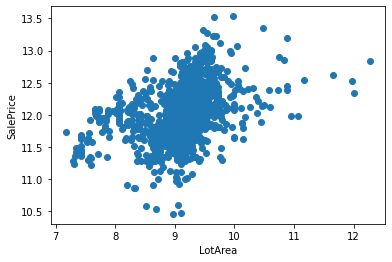

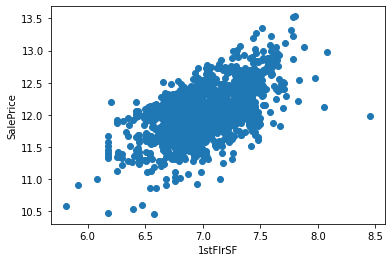

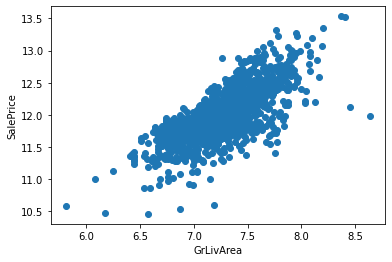

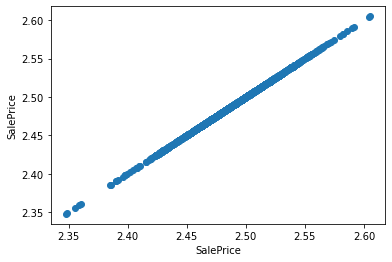

In [15]:
for feature in continuous_feature:
  data=dataset.copy()
  if 0 in data[feature].unique():
    pass
  else:
    data[feature]=np.log(data[feature])
    data['SalePrice']=np.log(data['SalePrice'])
    plt.scatter(data[feature],data['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

Finding outliers using box plot.

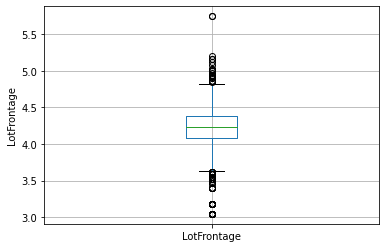

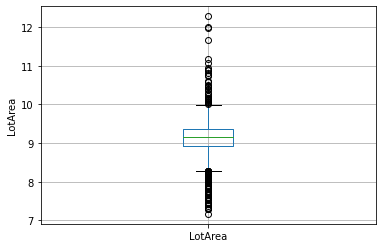

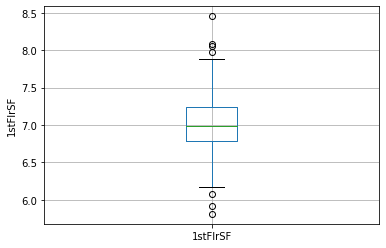

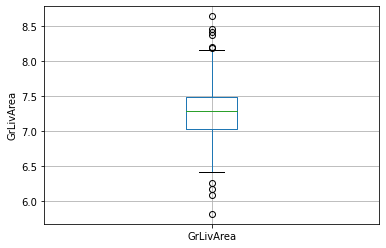

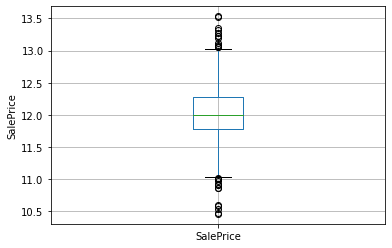

In [16]:
for feature in continuous_feature:
  data=dataset.copy()
  if 0 in data[feature].unique():
    pass
  else:
    data[feature]=np.log(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    #plt.title(feature)
    plt.show()

**Categorical Variables**

In [17]:
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtype=='O']
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [18]:
dataset[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [19]:
for feature in categorical_features:
  print('Cardinality of feature {} is {}'.format(feature,len(dataset[feature].unique())))

Cardinality of feature MSZoning is 5
Cardinality of feature Street is 2
Cardinality of feature Alley is 3
Cardinality of feature LotShape is 4
Cardinality of feature LandContour is 4
Cardinality of feature Utilities is 2
Cardinality of feature LotConfig is 5
Cardinality of feature LandSlope is 3
Cardinality of feature Neighborhood is 25
Cardinality of feature Condition1 is 9
Cardinality of feature Condition2 is 8
Cardinality of feature BldgType is 5
Cardinality of feature HouseStyle is 8
Cardinality of feature RoofStyle is 6
Cardinality of feature RoofMatl is 8
Cardinality of feature Exterior1st is 15
Cardinality of feature Exterior2nd is 16
Cardinality of feature MasVnrType is 5
Cardinality of feature ExterQual is 4
Cardinality of feature ExterCond is 5
Cardinality of feature Foundation is 6
Cardinality of feature BsmtQual is 5
Cardinality of feature BsmtCond is 5
Cardinality of feature BsmtExposure is 5
Cardinality of feature BsmtFinType1 is 7
Cardinality of feature BsmtFinType2 is 7

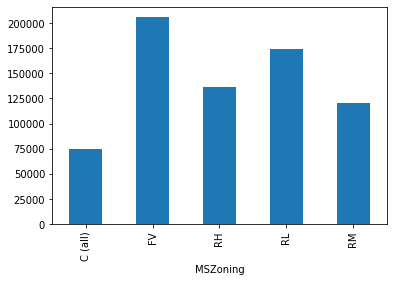

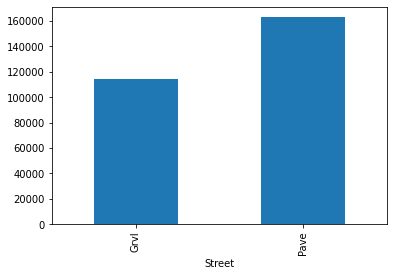

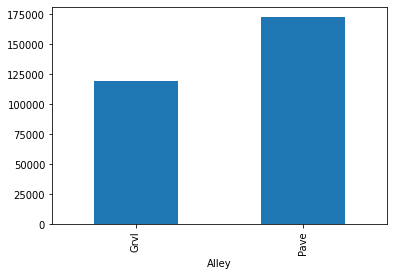

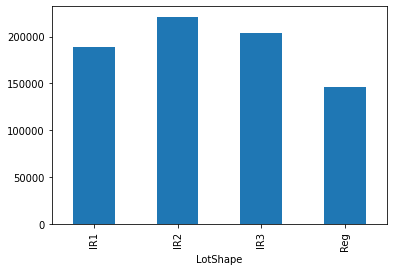

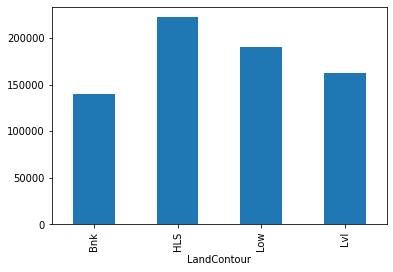

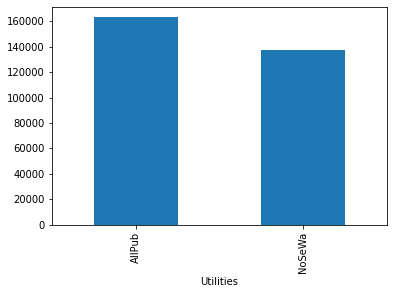

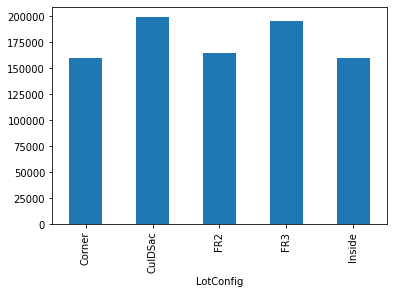

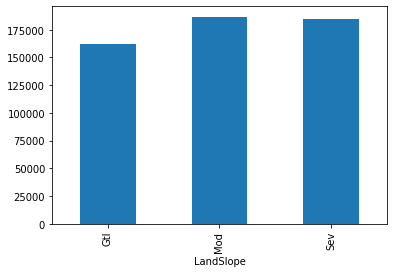

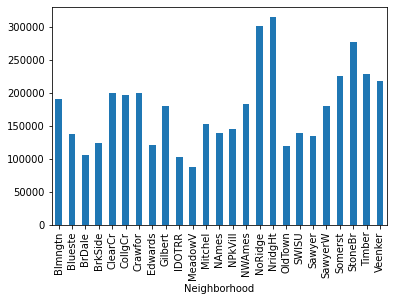

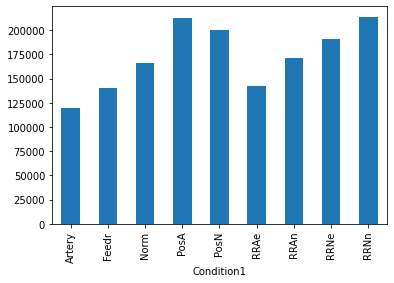

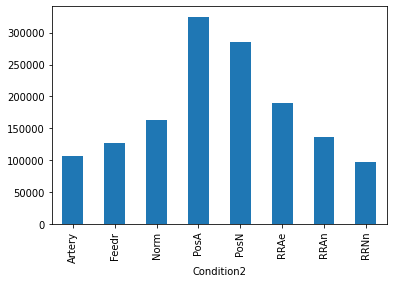

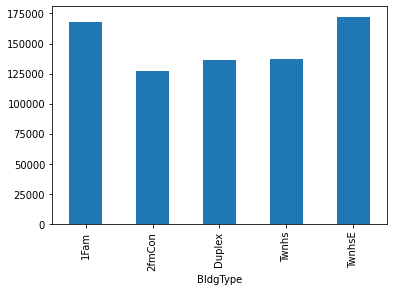

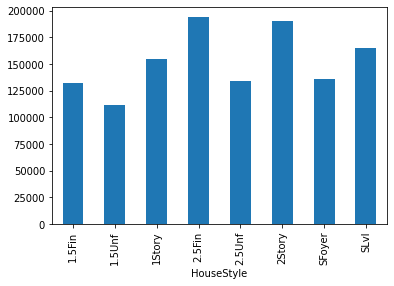

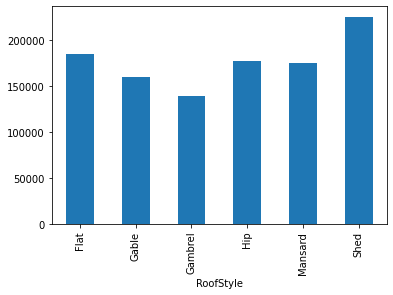

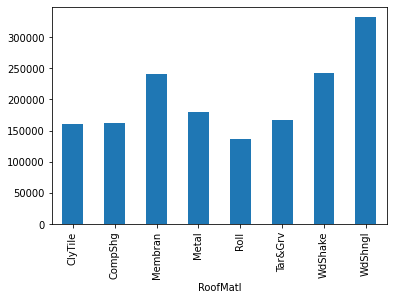

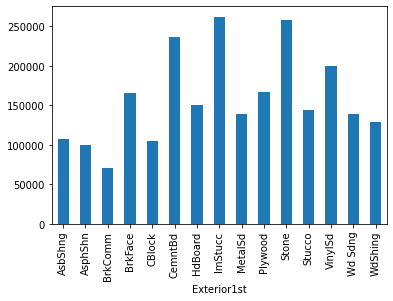

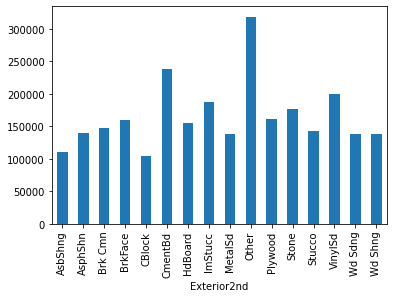

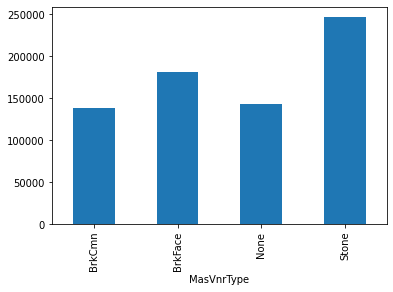

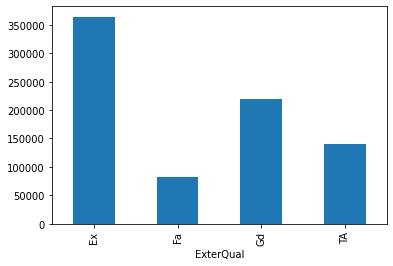

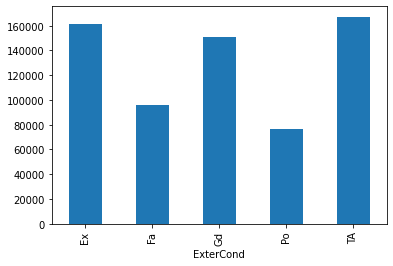

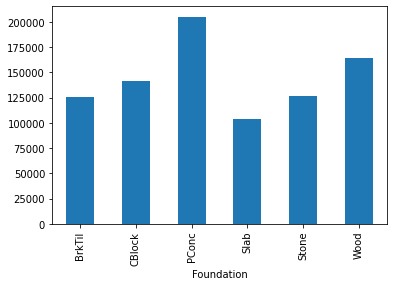

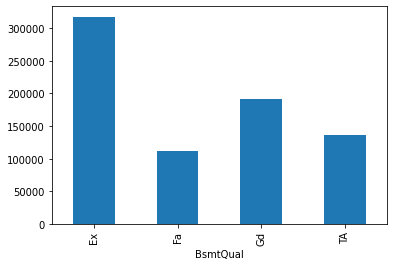

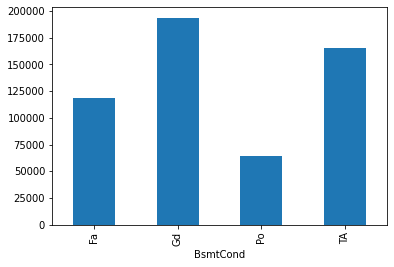

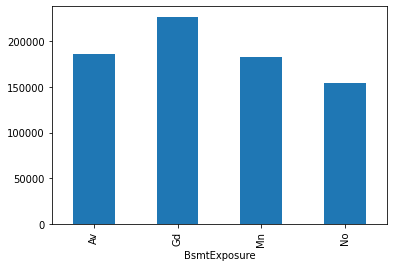

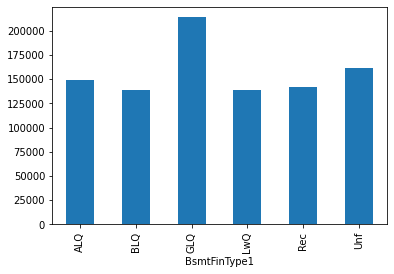

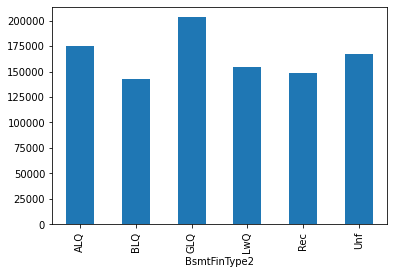

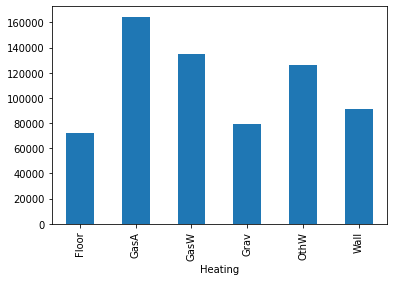

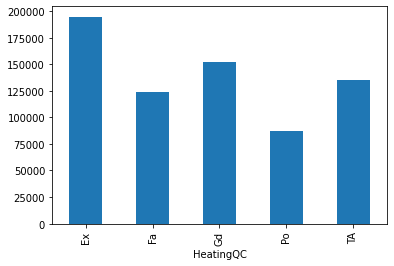

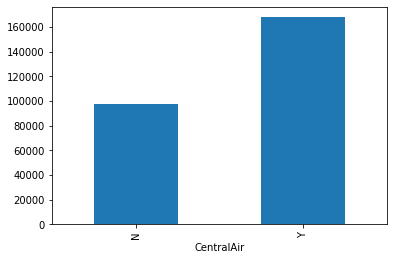

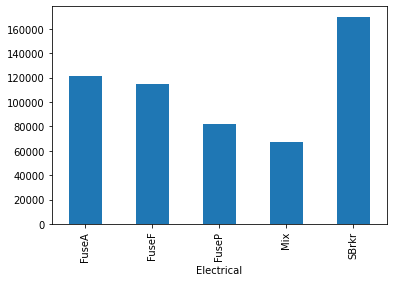

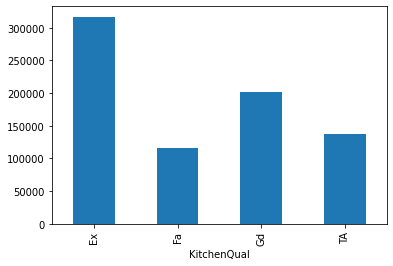

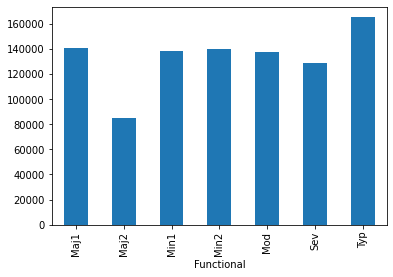

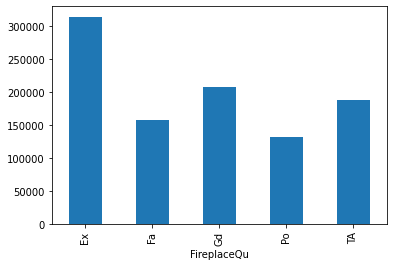

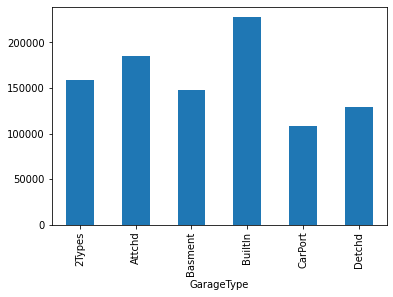

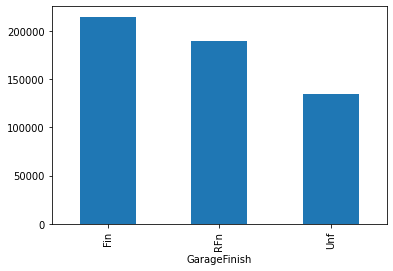

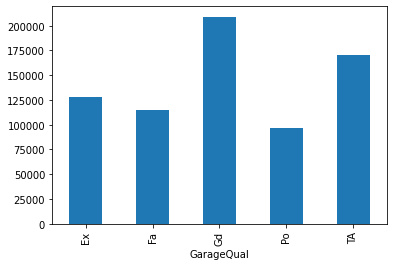

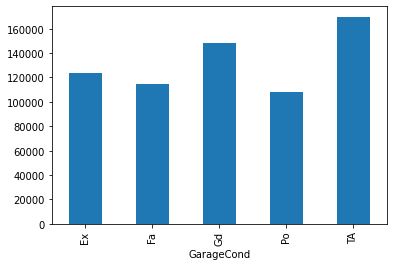

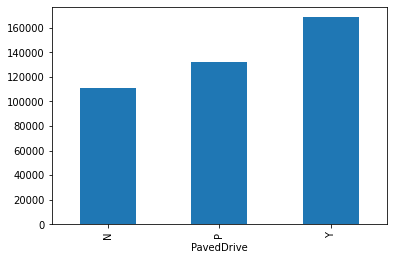

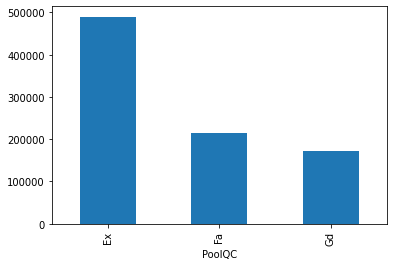

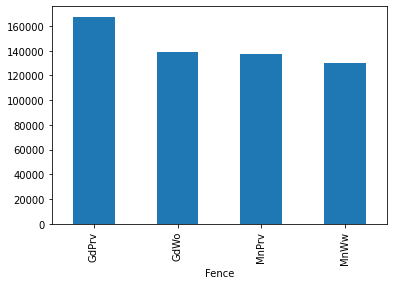

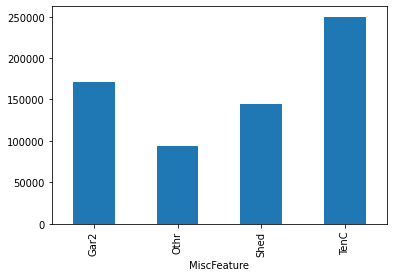

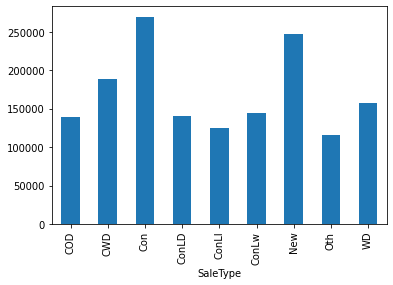

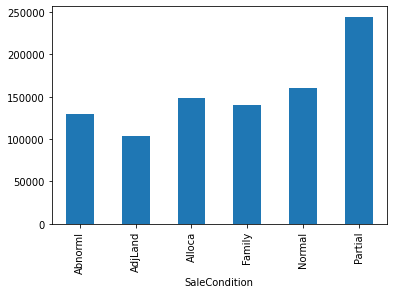

In [20]:
for feature in categorical_features:
  data=dataset.copy()
  data.groupby(feature)['SalePrice'].median().plot.bar()
  plt.show()

# **Feature Engineering**

**Handling missing values**

Updating Missing values in Categorical features with keyword 'Missing'.

In [21]:
test_dataset=pd.read_csv(r'C:\AI Practice\House Price Prediction - Kaggle\house-prices-advanced-regression-techniques\test.csv')

In [22]:
#Identify all the features whiich are string(Object) data type and have nan values
features_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>=1 and dataset[feature].dtype=='O']
for feature in features_nan:
  print('{} feature has {} % nan values'.format(feature,np.round(dataset[feature].isnull().mean(),4)))

Alley feature has 0.9377 % nan values
MasVnrType feature has 0.0055 % nan values
BsmtQual feature has 0.0253 % nan values
BsmtCond feature has 0.0253 % nan values
BsmtExposure feature has 0.026 % nan values
BsmtFinType1 feature has 0.0253 % nan values
BsmtFinType2 feature has 0.026 % nan values
Electrical feature has 0.0007 % nan values
FireplaceQu feature has 0.4726 % nan values
GarageType feature has 0.0555 % nan values
GarageFinish feature has 0.0555 % nan values
GarageQual feature has 0.0555 % nan values
GarageCond feature has 0.0555 % nan values
PoolQC feature has 0.9952 % nan values
Fence feature has 0.8075 % nan values
MiscFeature feature has 0.963 % nan values


In [23]:
#For test dataset: Identify all the features whiich are string(Object) data type and have nan values
test_features_nan=[feature for feature in test_dataset.columns if test_dataset[feature].isnull().sum()>=1 and test_dataset[feature].dtype=='O']
for feature in test_features_nan:
  print('{} feature has {} % nan values'.format(feature,np.round(test_dataset[feature].isnull().mean(),4)))

MSZoning feature has 0.0027 % nan values
Alley feature has 0.9267 % nan values
Utilities feature has 0.0014 % nan values
Exterior1st feature has 0.0007 % nan values
Exterior2nd feature has 0.0007 % nan values
MasVnrType feature has 0.011 % nan values
BsmtQual feature has 0.0302 % nan values
BsmtCond feature has 0.0308 % nan values
BsmtExposure feature has 0.0302 % nan values
BsmtFinType1 feature has 0.0288 % nan values
BsmtFinType2 feature has 0.0288 % nan values
KitchenQual feature has 0.0007 % nan values
Functional feature has 0.0014 % nan values
FireplaceQu feature has 0.5003 % nan values
GarageType feature has 0.0521 % nan values
GarageFinish feature has 0.0535 % nan values
GarageQual feature has 0.0535 % nan values
GarageCond feature has 0.0535 % nan values
PoolQC feature has 0.9979 % nan values
Fence feature has 0.8012 % nan values
MiscFeature feature has 0.965 % nan values
SaleType feature has 0.0007 % nan values


In [24]:
#Display the sample data for the above features
dataset[features_nan].head()

,Alley,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,NaN,BrkFace,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,RFn,TA,TA,NaN,NaN,NaN
1,NaN,None,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN
2,NaN,BrkFace,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN
3,NaN,None,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,Unf,TA,TA,NaN,NaN,NaN
4,NaN,BrkFace,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN


In [25]:
#Replace the nan values with a new label 'Missing' for the above features
def replace_cat_feature(dataset,features_nan):
  data=dataset.copy()
  data[features_nan]=data[features_nan].fillna('Missing')
  return data

dataset=replace_cat_feature(dataset,features_nan)
test_dataset=replace_cat_feature(test_dataset,test_features_nan)

In [26]:
dataset[features_nan].head()

,Alley,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,Missing,BrkFace,Gd,TA,No,GLQ,Unf,SBrkr,Missing,Attchd,RFn,TA,TA,Missing,Missing,Missing
1,Missing,None,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA,Missing,Missing,Missing
2,Missing,BrkFace,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA,Missing,Missing,Missing
3,Missing,None,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,Unf,TA,TA,Missing,Missing,Missing
4,Missing,BrkFace,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA,Missing,Missing,Missing


In [27]:
test_dataset[test_features_nan].head()

,MSZoning,Alley,Utilities,Exterior1st,Exterior2nd,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType
0,RH,Missing,AllPub,VinylSd,VinylSd,None,TA,TA,No,Rec,LwQ,TA,Typ,Missing,Attchd,Unf,TA,TA,Missing,MnPrv,Missing,WD
1,RL,Missing,AllPub,Wd Sdng,Wd Sdng,BrkFace,TA,TA,No,ALQ,Unf,Gd,Typ,Missing,Attchd,Unf,TA,TA,Missing,Missing,Gar2,WD
2,RL,Missing,AllPub,VinylSd,VinylSd,None,Gd,TA,No,GLQ,Unf,TA,Typ,TA,Attchd,Fin,TA,TA,Missing,MnPrv,Missing,WD
3,RL,Missing,AllPub,VinylSd,VinylSd,BrkFace,TA,TA,No,GLQ,Unf,Gd,Typ,Gd,Attchd,Fin,TA,TA,Missing,Missing,Missing,WD
4,RL,Missing,AllPub,HdBoard,HdBoard,None,Gd,TA,No,ALQ,Unf,Gd,Typ,Missing,Attchd,RFn,TA,TA,Missing,Missing,Missing,WD


**Update the null values in numerical features wtih Median**

In [28]:
#Get all the numerical features with nan 
numeric_with_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>=1 and dataset[feature].dtype!='O']
for feature in  numeric_with_nan:
  print('{} feature has {} % nan values'.format(feature,round(dataset[feature].isnull().mean(),4)))

LotFrontage feature has 0.1774 % nan values
MasVnrArea feature has 0.0055 % nan values
GarageYrBlt feature has 0.0555 % nan values


In [29]:
#Test dataset: Get all the numerical features with nan 
test_numeric_with_nan=[feature for feature in test_dataset.columns if test_dataset[feature].isnull().sum()>=1 and test_dataset[feature].dtype!='O']
for feature in  test_numeric_with_nan:
  print('{} feature has {} % nan values'.format(feature,round(test_dataset[feature].isnull().mean(),4)))

LotFrontage feature has 0.1556 % nan values
MasVnrArea feature has 0.0103 % nan values
BsmtFinSF1 feature has 0.0007 % nan values
BsmtFinSF2 feature has 0.0007 % nan values
BsmtUnfSF feature has 0.0007 % nan values
TotalBsmtSF feature has 0.0007 % nan values
BsmtFullBath feature has 0.0014 % nan values
BsmtHalfBath feature has 0.0014 % nan values
GarageYrBlt feature has 0.0535 % nan values
GarageCars feature has 0.0007 % nan values
GarageArea feature has 0.0007 % nan values


In [30]:
#Add extra an extra feature for each feature to store details of if the value in actual feature is replaced or not. Also replace nan with median.
for feature in numeric_with_nan:
  median_val=dataset[feature].median()
  dataset[feature+'nan']=np.where(dataset[feature].isnull(),1,0)
  dataset[feature]=dataset[feature].fillna(median_val)

In [31]:
#Test dataset: Add extra an extra feature for each feature to store details of if the value in actual feature is replaced or not. Also replace nan with median.
for feature in test_numeric_with_nan:
  median_val=test_dataset[feature].median()
  test_dataset[feature+'nan']=np.where(test_dataset[feature].isnull(),1,0)
  test_dataset[feature]=test_dataset[feature].fillna(median_val)

In [32]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000,0,0,0


In [33]:
dataset[test_numeric_with_nan].isnull().sum()

LotFrontage     0
MasVnrArea      0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
GarageYrBlt     0
GarageCars      0
GarageArea      0
dtype: int64

Update the year values with difference between the feature's year and YrSold

In [34]:
for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
  dataset[feature]=dataset['YrSold']-dataset[feature]

In [35]:
for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
  test_dataset[feature]=test_dataset['YrSold']-test_dataset[feature]

In [36]:
dataset[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,5,5,5.0
1,31,31,31.0
2,7,6,7.0
3,91,36,8.0
4,8,8,8.0


Since the numeraical values are skewed, perform the log normal distribution.

In [37]:
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']
for feature in num_features:
  dataset[feature]=np.log(dataset[feature])

In [38]:
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea']
for feature in num_features:
  test_dataset[feature]=np.log(test_dataset[feature])

In [39]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,12.247694,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,12.109011,0,0,0
2,3,60,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,12.317167,0,0,0
3,4,70,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,11.849398,0,0,0
4,5,60,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,12.429216,0,0,0


Idetify rare categories and update them with single value 'Rare_var'.

In [40]:
for feature in categorical_features:
  temp=dataset.groupby(feature)['SalePrice'].count()/len(dataset)
  temp_df=temp[temp>0.01].index
  dataset[feature]=np.where(dataset[feature].isin(temp_df),dataset[feature],'Rare_var')
  test_dataset[feature]=np.where(test_dataset[feature].isin(temp_df),test_dataset[feature],'Rare_var')



In [41]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,12.247694,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Rare_var,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,12.109011,0,0,0
2,3,60,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,12.317167,0,0,0
3,4,70,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,11.849398,0,0,0
4,5,60,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,12.429216,0,0,0


Now convert the categorical values into numbers based on mean of Sale price. The category which has highest mean saleprice has to has highest numerical value and so on.

In [42]:
for feature in categorical_features:
  uniq_category=dataset.groupby(feature)['SalePrice'].mean().sort_values().index
  uniq_category={k:i for i,k in enumerate(uniq_category,0)}
  dataset[feature]=dataset[feature].map(uniq_category)
  test_dataset[feature]=test_dataset[feature].map(uniq_category)

In [43]:
dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,3,4.174387,9.041922,1,2,0,1,1,0,0,14,2,1,3,5,7,5,5,5,0,0,10,10,2,196.0,2,3,4,3,3,1,6,706,5,0,150,856,2,4,1,3,6.752270,854,0,7.444249,1,0,2,1,3,1,2,8,4,0,1,4,5.0,2,2,548,2,3,2,0,61,0,0,0,0,0,4,2,0,2,2008,2,3,12.247694,0,0,0
1,2,20,3,4.382027,9.169518,1,2,0,1,1,2,0,11,1,1,3,3,6,8,31,31,0,0,4,3,1,0.0,1,3,2,3,3,4,4,978,5,0,284,1262,2,4,1,3,7.140453,0,0,7.140453,0,1,2,0,3,1,1,6,4,1,3,4,31.0,2,2,460,2,3,2,298,0,0,0,0,0,0,4,2,0,5,2007,2,3,12.109011,0,0,0
2,3,60,3,4.219508,9.328123,1,2,1,1,1,0,0,14,2,1,3,5,7,5,7,6,0,0,10,10,2,162.0,2,3,4,3,3,2,6,486,5,0,434,920,2,4,1,3,6.824374,866,0,7.487734,1,0,2,1,3,1,2,6,4,1,3,4,7.0,2,2,608,2,3,2,0,42,0,0,0,0,0,4,2,0,9,2008,2,3,12.317167,0,0,0
3,4,70,3,4.094345,9.164296,1,2,1,1,1,1,0,16,2,1,3,5,7,5,91,36,0,0,2,4,1,0.0,1,3,1,2,4,1,4,216,5,0,540,756,2,3,1,3,6.867974,756,0,7.448334,1,0,1,0,3,1,2,7,4,1,4,2,8.0,1,3,642,2,3,2,0,35,272,0,0,0,0,4,2,0,2,2006,2,0,11.849398,0,0,0
4,5,60,3,4.430817,9.565214,1,2,1,1,1,2,0,22,2,1,3,5,8,5,8,8,0,0,10,10,2,350.0,2,3,4,3,3,3,6,655,5,0,490,1145,2,4,1,3,7.043160,1053,0,7.695303,1,0,2,1,4,1,2,9,4,1,3,4,8.0,2,3,836,2,3,2,192,84,0,0,0,0,0,4,2,0,12,2008,2,3,12.429216,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,4.127134,8.976768,1,2,0,1,1,0,0,13,2,1,3,5,6,5,8,7,0,0,10,10,1,0.0,1,3,4,3,3,1,5,0,5,0,953,953,2,4,1,3,6.859615,694,0,7.406711,0,0,2,1,3,1,1,7,4,1,3,4,8.0,2,2,460,2,3,2,0,40,0,0,0,0,0,4,2,0,8,2007,2,3,12.072541,0,0,0
1456,1457,20,3,4.442651,9.486076,1,2,0,1,1,0,0,12,2,1,3,3,6,6,32,22,0,0,7,7,4,119.0,1,3,2,3,3,1,4,790,2,163,589,1542,2,2,1,3,7.636752,0,0,7.636752,1,0,2,0,3,1,1,7,3,2,3,4,32.0,1,2,500,2,3,2,349,0,0,0,0,0,0,2,2,0,2,2010,2,3,12.254863,0,0,0
1457,1458,70,3,4.189655,9.109636,1,2,0,1,1,0,0,16,2,1,3,5,7,9,69,4,0,0,9,9,1,0.0,3,2,3,2,4,1,6,275,5,0,877,1152,2,4,1,3,7.080026,1152,0,7.757906,0,0,2,0,4,1,2,9,4,2,4,4,69.0,2,1,252,2,3,2,0,60,0,0,0,0,0,3,1,2500,5,2010,2,3,12.493130,0,0,0
1458,1459,20,3,4.219508,9.181632,1,2,0,1,1,0,0,8,2,1,3,3,5,6,60,14,2,0,4,3,1,0.0,1,3,2,2,3,2,6,49,2,1029,0,1078,2,3,1,2,6.982863,0,0,6.982863,1,0,1,0,2,1,2,5,4,0,1,4,60.0,1,1,240,2,3,2,366,0,112,0,0,0,0,4,2,0,4,2010,2,3,11.864462,0,0,0


In [44]:
test_dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,BsmtFinSF1nan,BsmtFinSF2nan,BsmtUnfSFnan,TotalBsmtSFnan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan,GarageCarsnan,GarageAreanan
0,1461,20,2,4.382027,9.360655,1,2,0,1,1,0,0,8,1,1,3,3,5,6,49,49,0,0,10,10,1,0.0,1,3,2,2,3,1,1,468.0,3,144.0,270.0,882.0,2,2,1,3,6.797940,0,0,6.797940,0.0,0.0,1,0,2,1,1.0,5,4,0,1,4,49.0,1,1.0,730.0,2,3,2,140,0,0,0,120,0,0,2,2,0,6,2010,2,3,0,0,0,0,0,0,0,0,0,0,0
1,1462,20,3,4.394449,9.565704,1,2,1,1,1,1,0,8,2,1,3,3,6,6,52,52,2,0,2,1,2,108.0,1,3,2,2,3,1,4,923.0,5,0.0,406.0,1329.0,2,2,1,3,7.192182,0,0,7.192182,0.0,0.0,1,1,3,1,2.0,6,4,0,1,4,52.0,1,1.0,312.0,2,3,2,393,36,0,0,0,0,0,4,0,12500,6,2010,2,3,0,0,0,0,0,0,0,0,0,0,0
2,1463,60,3,4.304065,9.534595,1,2,1,1,1,0,0,13,2,1,3,5,5,5,13,12,0,0,10,10,1,0.0,1,3,4,3,3,1,6,791.0,5,0.0,137.0,928.0,2,3,1,3,6.833032,701,0,7.395722,0.0,0.0,2,1,3,1,1.0,6,4,1,3,4,13.0,3,2.0,482.0,2,3,2,212,34,0,0,0,0,0,2,2,0,3,2010,2,3,0,0,0,0,0,0,0,0,0,0,0
3,1464,60,3,4.356709,9.208138,1,2,1,1,1,0,0,13,2,1,3,5,6,6,12,12,0,0,10,10,2,20.0,1,3,4,2,3,1,6,602.0,5,0.0,324.0,926.0,2,4,1,3,6.830874,678,0,7.380256,0.0,0.0,2,1,3,1,2.0,7,4,1,4,4,12.0,3,2.0,470.0,2,3,2,360,36,0,0,0,0,0,4,2,0,6,2010,2,3,0,0,0,0,0,0,0,0,0,0,0
4,1465,120,3,3.761200,8.518193,1,2,1,3,1,0,0,20,2,1,4,3,8,5,18,18,0,0,6,5,1,0.0,2,3,4,3,3,1,4,263.0,5,0.0,1017.0,1280.0,2,4,1,3,7.154615,0,0,7.154615,0.0,0.0,2,0,2,1,2.0,5,4,0,1,4,18.0,2,2.0,506.0,2,3,2,0,82,0,0,144,0,0,4,2,0,1,2010,2,3,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,1,3.044522,7.568379,1,2,0,1,1,0,0,1,2,1,1,5,4,7,36,36,0,0,9,9,1,0.0,1,3,2,2,3,1,5,0.0,5,0.0,546.0,546.0,2,3,1,3,6.302619,546,0,6.995766,0.0,0.0,1,1,3,1,1.0,5,4,0,1,0,27.0,0,0.0,0.0,0,0,2,0,0,0,0,0,0,0,4,2,0,6,2006,2,3,0,0,0,0,0,0,0,0,1,0,0
1455,2916,160,1,3.044522,7.546446,1,2,0,1,1,0,0,1,2,1,4,5,4,5,36,36,0,0,9,9,1,0.0,1,3,2,2,3,1,1,252.0,5,0.0,294.0,546.0,2,2,1,3,6.302619,546,0,6.995766,0.0,0.0,1,1,3,1,1.0,6,4,0,1,1,36.0,1,1.0,286.0,2,3,2,0,24,0,0,0,0,0,4,2,0,4,2006,2,0,0,0,0,0,0,0,0,0,0,0,0
1456,2917,20,3,5.075174,9.903488,1,2,0,1,1,0,0,9,2,1,3,3,5,7,46,10,0,0,10,10,1,0.0,1,3,2,2,3,1,4,1224.0,5,0.0,0.0,1224.0,2,4,1,3,7.109879,0,0,7.109879,1.0,0.0,1,0,4,1,1.0,7,4,1,3,2,46.0,1,2.0,576.0,2,3,2,474,0,0,0,0,0,0,4,2,0,9,2006,2,0,0,0,0,0,0,0,0,0,0,0,0
1457,2918,85,3,4.127134,9.253496,1,2,0,1,1,0,0,9,2,1,3,0,5,5,14,14,0,0,6,4,1,0.0,1,3,4,3,3,3,6,337.0,5,0.0,575.0,912.0,2,2,1,3,6.877296,0,0,6.877296,0.0,1.0,1,0,3,1,1.0,6,4,0,1,0,27.0,0,0.0,0.0,0,0,2,80,32,0,0,0,0,0,2,1,700,7,2006,2,3,0,0,0,0,0,0,0,0,1,0,0


**Feature Scaling**

Scaling the features. convert all the features into values between 0 and 1.

In [45]:
features_scaling=[feature for feature in dataset.columns if feature not in ['Id','SalePrice']]
features_scaling

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'Enc

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(dataset[features_scaling])

MinMaxScaler()

In [47]:
scaler.transform(dataset[features_scaling])

array([[0.23529412, 0.75      , 0.41820812, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.49506375, ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 0.75      , 0.434909  , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.29411765, 0.75      , 0.42385922, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.434909  , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.47117546, ..., 0.        , 0.        ,
        0.        ]])

In [48]:
data = pd.concat([dataset[['Id', 'SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(dataset[features_scaling]), columns=features_scaling)],
                    axis=1)

In [49]:
dataset[['Id','SalePrice']]

,Id,SalePrice
0,1,12.247694
1,2,12.109011
2,3,12.317167
3,4,11.849398
4,5,12.429216
...,...,...
1455,1456,12.072541
1456,1457,12.254863
1457,1458,12.493130
1458,1459,11.864462


In [50]:
test_data = pd.concat([test_dataset[['Id']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(test_dataset[features_scaling]), columns=features_scaling)],
                    axis=1)

In [51]:
data

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,12.247694,0.235294,0.75,0.418208,0.366344,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.636364,0.4,1.0,0.75,1.0,0.666667,0.500,0.036765,0.098361,0.0,0.0,1.0,1.0,0.50,0.122500,0.666667,1.000000,1.00,0.75,0.75,0.25,1.000000,0.125089,0.833333,0.000000,0.064212,0.140098,1.0,1.00,1.0,1.000000,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.00,0.000000,0.2,0.8,0.046729,0.666667,0.50,0.386460,0.666667,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,1.00,1.0,0.00000,0.090909,0.50,0.666667,0.75,0.0,0.0,0.0
1,2,12.109011,0.000000,0.75,0.495064,0.391317,1.0,1.0,0.000000,0.333333,1.0,0.50,0.0,0.500000,0.2,1.0,0.75,0.6,0.555556,0.875,0.227941,0.524590,0.0,0.0,0.4,0.3,0.25,0.000000,0.333333,1.000000,0.50,0.75,0.75,1.00,0.666667,0.173281,0.833333,0.000000,0.121575,0.206547,1.0,1.00,1.0,1.000000,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,1.00,0.333333,0.6,0.8,0.289720,0.666667,0.50,0.324401,0.666667,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,1.00,1.0,0.00000,0.363636,0.25,0.666667,0.75,0.0,0.0,0.0
2,3,12.317167,0.235294,0.75,0.434909,0.422359,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.636364,0.4,1.0,0.75,1.0,0.666667,0.500,0.051471,0.114754,0.0,0.0,1.0,1.0,0.50,0.101250,0.666667,1.000000,1.00,0.75,0.75,0.50,1.000000,0.086109,0.833333,0.000000,0.185788,0.150573,1.0,1.00,1.0,1.000000,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.00,0.333333,0.6,0.8,0.065421,0.666667,0.50,0.428773,0.666667,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,1.00,1.0,0.00000,0.727273,0.50,0.666667,0.75,0.0,0.0,0.0
3,4,11.849398,0.294118,0.75,0.388581,0.390295,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,0.727273,0.4,1.0,0.75,1.0,0.666667,0.500,0.669118,0.606557,0.0,0.0,0.2,0.4,0.25,0.000000,0.333333,1.000000,0.25,0.50,1.00,0.25,0.666667,0.038271,0.833333,0.000000,0.231164,0.123732,1.0,0.75,1.0,1.000000,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.00,0.333333,0.8,0.4,0.074766,0.333333,0.75,0.452750,0.666667,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,1.00,1.0,0.00000,0.090909,0.00,0.666667,0.00,0.0,0.0,0.0
4,5,12.429216,0.235294,0.75,0.513123,0.468761,1.0,1.0,0.333333,0.333333,1.0,0.50,0.0,1.000000,0.4,1.0,0.75,1.0,0.777778,0.500,0.058824,0.147541,0.0,0.0,1.0,1.0,0.50,0.218750,0.666667,1.000000,1.00,0.75,0.75,0.75,1.000000,0.116052,0.833333,0.000000,0.209760,0.187398,1.0,1.00,1.0,1.000000,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.00,0.333333,0.6,0.8,0.074766,0.666667,0.75,0.589563,0.666667,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.00,1.0,0.00000,1.000000,0.50,0.666667,0.75,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,12.07

# **Feature Selection**

**Feature selection**

In [52]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [53]:
y_train=data[['SalePrice']]

In [54]:
y_train.head()

,SalePrice
0,12.247694
1,12.109011
2,12.317167
3,11.849398
4,12.429216


In [55]:
X_train=data.drop(['Id','SalePrice'],axis=1)

In [56]:
X_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,0.235294,0.75,0.418208,0.366344,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.636364,0.4,1.0,0.75,1.0,0.666667,0.500,0.036765,0.098361,0.0,0.0,1.0,1.0,0.50,0.122500,0.666667,1.000000,1.00,0.75,0.75,0.25,1.000000,0.125089,0.833333,0.000000,0.064212,0.140098,1.0,1.00,1.0,1.000000,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.00,0.000000,0.2,0.8,0.046729,0.666667,0.50,0.386460,0.666667,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,1.00,1.0,0.00000,0.090909,0.50,0.666667,0.75,0.0,0.0,0.0
1,0.000000,0.75,0.495064,0.391317,1.0,1.0,0.000000,0.333333,1.0,0.50,0.0,0.500000,0.2,1.0,0.75,0.6,0.555556,0.875,0.227941,0.524590,0.0,0.0,0.4,0.3,0.25,0.000000,0.333333,1.000000,0.50,0.75,0.75,1.00,0.666667,0.173281,0.833333,0.000000,0.121575,0.206547,1.0,1.00,1.0,1.000000,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,1.00,0.333333,0.6,0.8,0.289720,0.666667,0.50,0.324401,0.666667,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,1.00,1.0,0.00000,0.363636,0.25,0.666667,0.75,0.0,0.0,0.0
2,0.235294,0.75,0.434909,0.422359,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.636364,0.4,1.0,0.75,1.0,0.666667,0.500,0.051471,0.114754,0.0,0.0,1.0,1.0,0.50,0.101250,0.666667,1.000000,1.00,0.75,0.75,0.50,1.000000,0.086109,0.833333,0.000000,0.185788,0.150573,1.0,1.00,1.0,1.000000,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.00,0.333333,0.6,0.8,0.065421,0.666667,0.50,0.428773,0.666667,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,1.00,1.0,0.00000,0.727273,0.50,0.666667,0.75,0.0,0.0,0.0
3,0.294118,0.75,0.388581,0.390295,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,0.727273,0.4,1.0,0.75,1.0,0.666667,0.500,0.669118,0.606557,0.0,0.0,0.2,0.4,0.25,0.000000,0.333333,1.000000,0.25,0.50,1.00,0.25,0.666667,0.038271,0.833333,0.000000,0.231164,0.123732,1.0,0.75,1.0,1.000000,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.00,0.333333,0.8,0.4,0.074766,0.333333,0.75,0.452750,0.666667,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,1.00,1.0,0.00000,0.090909,0.00,0.666667,0.00,0.0,0.0,0.0
4,0.235294,0.75,0.513123,0.468761,1.0,1.0,0.333333,0.333333,1.0,0.50,0.0,1.000000,0.4,1.0,0.75,1.0,0.777778,0.500,0.058824,0.147541,0.0,0.0,1.0,1.0,0.50,0.218750,0.666667,1.000000,1.00,0.75,0.75,0.75,1.000000,0.116052,0.833333,0.000000,0.209760,0.187398,1.0,1.00,1.0,1.000000,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.00,0.333333,0.6,0.8,0.074766,0.666667,0.75,0.589563,0.666667,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.00,1.0,0.00000,1.000000,0.50,0.666667,0.75,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.235294,0.75,0.400718,0.353592,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.590909,0.4,1.0,0.7

In [57]:
feature_selection_model=SelectFromModel(Lasso(alpha=0.005,random_state=0))
feature_selection_model.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [58]:
feature_selection_model.get_support()

array([ True,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False,  True,  True, False,  True, False, False,
        True,  True, False, False, False, False, False,  True, False,
       False,  True,  True,  True, False,  True,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False])

In [59]:
selected_features=X_train.columns[feature_selection_model.get_support()]

print('Total number of features is {}'.format(len(X_train.columns)))
print('Number of selected features is {}'.format(len(selected_features)))
print()

Total number of features is 82
Number of selected features is 21



In [60]:
X_train=X_train[selected_features]

In [61]:
X_train.head()

,MSSubClass,MSZoning,Neighborhood,OverallQual,YearRemodAdd,RoofStyle,BsmtQual,BsmtExposure,HeatingQC,CentralAir,1stFlrSF,GrLivArea,BsmtFullBath,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,PavedDrive,SaleCondition
0,0.235294,0.75,0.636364,0.666667,0.098361,0.0,0.75,0.25,1.00,1.0,0.356155,0.577712,0.333333,0.666667,0.000000,0.2,0.8,0.666667,0.50,1.0,0.75
1,0.000000,0.75,0.500000,0.555556,0.524590,0.0,0.75,1.00,1.00,1.0,0.503056,0.470245,0.000000,0.333333,0.333333,0.6,0.8,0.666667,0.50,1.0,0.75
2,0.235294,0.75,0.636364,0.666667,0.114754,0.0,0.75,0.50,1.00,1.0,0.383441,0.593095,0.333333,0.666667,0.333333,0.6,0.8,0.666667,0.50,1.0,0.75
3,0.294118,0.75,0.727273,0.666667,0.606557,0.0,0.50,0.25,0.75,1.0,0.399941,0.579157,0.333333,0.666667,0.333333,0.8,0.4,0.333333,0.75,1.0,0.00
4,0.235294,0.75,1.000000,0.777778,0.147541,0.0,0.75,0.75,1.00,1.0,0.466237,0.666523,0.333333,0.666667,0.333333,0.6,0.8,0.666667,0.75,1.0,0.75


In [62]:
X_train.to_csv('C:\AI Practice\House Price Prediction - Kaggle\house-prices-advanced-regression-techniques\X_train.csv')

In [63]:
y_train.to_csv('C:\AI Practice\House Price Prediction - Kaggle\house-prices-advanced-regression-techniques\y_train.csv')

In [64]:
X_test=test_data[selected_features]

In [65]:
X_test

,MSSubClass,MSZoning,Neighborhood,OverallQual,YearRemodAdd,RoofStyle,BsmtQual,BsmtExposure,HeatingQC,CentralAir,1stFlrSF,GrLivArea,BsmtFullBath,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,PavedDrive,SaleCondition
0,0.000000,0.50,0.363636,0.444444,0.819672,0.0,0.50,0.25,0.50,1.0,0.373438,0.349081,0.000000,0.333333,0.000000,0.2,0.8,0.333333,0.25,1.0,0.75
1,0.000000,0.75,0.363636,0.555556,0.868852,1.0,0.50,0.25,0.50,1.0,0.522632,0.488544,0.000000,0.666667,0.000000,0.2,0.8,0.333333,0.25,1.0,0.75
2,0.235294,0.75,0.590909,0.444444,0.213115,0.0,0.75,0.25,0.75,1.0,0.386718,0.560546,0.000000,0.333333,0.333333,0.6,0.8,1.000000,0.50,1.0,0.75
3,0.235294,0.75,0.590909,0.555556,0.213115,0.0,0.50,0.25,1.00,1.0,0.385901,0.555075,0.000000,0.666667,0.333333,0.8,0.8,1.000000,0.50,1.0,0.75
4,0.588235,0.75,0.909091,0.777778,0.311475,0.0,0.75,0.25,1.00,1.0,0.508416,0.475254,0.000000,0.666667,0.000000,0.2,0.8,0.666667,0.50,1.0,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.823529,0.25,0.045455,0.333333,0.606557,0.0,0.50,0.25,0.75,1.0,0.185992,0.419061,0.000000,0.333333,0.000000,0.2,0.0,0.000000,0.00,1.0,0.75
1455,0.823529,0.25,0.045455,0.333333,0.606557,0.0,0.50,0.25,0.50,1.0,0.185992,0.419061,0.000000,0.333333,0.000000,0.2,0.2,0.333333,0.25,1.0,0.00
1456,0.000000,0.75,0.409091,0.444444,0.180328,0.0,0.50,0.25,1.00,1.0,0.491486,0.459429,0.333333,0.333333,0.333333,0.6,0.4,0.333333,0.50,1.0,0.00
1457,0.382353,0.75,0.409091,0.444444,0.245902,0.0,0.75,0.75,0.50,1.0,0.403469,0.377153,0.000000,0.333333,0.000000,0.2,0.0,0.000000,0.00,1.0,0.75


In [66]:
X_test.to_csv('C:\AI Practice\House Price Prediction - Kaggle\house-prices-advanced-regression-techniques\X_test.csv')

# **Training the model**

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [69]:
lr.score(X_train,y_train)

0.8867439324617351

In [134]:
X_test.

,MSSubClass,MSZoning,Neighborhood,OverallQual,YearRemodAdd,RoofStyle,BsmtQual,BsmtExposure,HeatingQC,CentralAir,1stFlrSF,GrLivArea,BsmtFullBath,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,PavedDrive,SaleCondition
0,0.000000,0.50,0.363636,0.444444,0.819672,0.0,0.50,0.25,0.50,1.0,0.373438,0.349081,0.000000,0.333333,0.000000,0.2,0.8,0.333333,0.25,1.0,0.75
1,0.000000,0.75,0.363636,0.555556,0.868852,1.0,0.50,0.25,0.50,1.0,0.522632,0.488544,0.000000,0.666667,0.000000,0.2,0.8,0.333333,0.25,1.0,0.75
2,0.235294,0.75,0.590909,0.444444,0.213115,0.0,0.75,0.25,0.75,1.0,0.386718,0.560546,0.000000,0.333333,0.333333,0.6,0.8,1.000000,0.50,1.0,0.75
3,0.235294,0.75,0.590909,0.555556,0.213115,0.0,0.50,0.25,1.00,1.0,0.385901,0.555075,0.000000,0.666667,0.333333,0.8,0.8,1.000000,0.50,1.0,0.75
4,0.588235,0.75,0.909091,0.777778,0.311475,0.0,0.75,0.25,1.00,1.0,0.508416,0.475254,0.000000,0.666667,0.000000,0.2,0.8,0.666667,0.50,1.0,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.823529,0.25,0.045455,0.333333,0.606557,0.0,0.50,0.25,0.75,1.0,0.185992,0.419061,0.000000,0.333333,0.000000,0.2,0.0,0.000000,0.00,1.0,0.75
1455,0.823529,0.25,0.045455,0.333333,0.606557,0.0,0.50,0.25,0.50,1.0,0.185992,0.419061,0.000000,0.333333,0.000000,0.2,0.2,0.333333,0.25,1.0,0.00
1456,0.000000,0.75,0.409091,0.444444,0.180328,0.0,0.50,0.25,1.00,1.0,0.491486,0.459429,0.333333,0.333333,0.333333,0.6,0.4,0.333333,0.50,1.0,0.00
1457,0.382353,0.75,0.409091,0.444444,0.245902,0.0,0.75,0.75,0.50,1.0,0.403469,0.377153,0.000000,0.333333,0.000000,0.2,0.0,0.000000,0.00,1.0,0.75


In [140]:
X_test.isnull().sum()

MSSubClass       0
MSZoning         0
Neighborhood     0
OverallQual      0
YearRemodAdd     0
RoofStyle        0
BsmtQual         0
BsmtExposure     0
HeatingQC        0
CentralAir       0
1stFlrSF         0
GrLivArea        0
BsmtFullBath     0
KitchenQual      1
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageCars       0
PavedDrive       0
SaleCondition    0
dtype: int64

In [74]:
from xgboost import XGBRegressor
xgb=XGBRegressor(n_estimators=1000)
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [75]:
xgb.score(X_train,y_train)

0.9998992006901335

In [137]:
pred=xgb.predict(X_test)

In [132]:
pred=np.exp(pred)
pred=np.concatenate((test_dataset['Id'].to_numpy().reshape(-1,1),pred.reshape(-1,1)),axis=1).astype(int)
pred=pd.DataFrame(pred,columns=['Id','SalePrice'])
pred.to_csv(r'C:\AI Practice\House Price Prediction - Kaggle\house-prices-advanced-regression-techniques\y_test_xgb.csv',index=False)

In [128]:
pred=pd.DataFrame(pred,columns=['Id','SalePrice'])
pred.to_csv(r'C:\AI Practice\House Price Prediction - Kaggle\house-prices-advanced-regression-techniques\y_test_xgb.csv',index=False)

In [119]:
test_dataset['Id'].to_numpy().reshape(-1,1)

array([[1461],
       [1462],
       [1463],
       ...,
       [2917],
       [2918],
       [2919]], dtype=int64)

In [111]:
test_dataset['Id'].to_numpy(,).reshape(1459).shape

(1459,)

In [107]:
pred.shape

(1459,)